# 1. Understand the Data:

lets load the dataset and and take a look at 1st few rows.
then we shall use basic information about the dataset using info() and describe() pre-defined functions in the pandas lib

In [264]:
#import the pandas as load the dataset
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('heart.csv')

df.head(10)

,age,sex,chest_pain,resting_bp,chol,fasting_blood_sugar,resting_electrocardiographic_results,max_hr,exercise_induced_angina,oldpeak,number_vessels
0,63,1,3,145,233,1,0,150,0,2.3,0
1,37,1,2,130,250,0,1,187,0,3.5,0
2,41,0,1,130,204,0,0,172,0,1.4,0
3,56,1,1,120,236,0,1,178,0,0.8,0
4,57,0,0,120,354,0,1,163,1,0.6,0
5,57,1,0,140,192,0,1,148,0,0.4,0
6,56,0,1,140,294,0,0,153,0,1.3,0
7,44,1,1,120,263,0,1,173,0,0.0,0
8,52,1,2,172,199,1,1,162,0,0.5,0
9,57,1,2,150,168,0,1,174,0,1.6,0


Here we get to know the first 10 columns of the dataset 

In [265]:
#highlights the total number of rows in the dataset, names of the columns, their data type, and any missing value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   303 non-null    int64  
 1   sex                                   303 non-null    int64  
 2   chest_pain                            303 non-null    int64  
 3   resting_bp                            303 non-null    int64  
 4   chol                                  303 non-null    int64  
 5   fasting_blood_sugar                   303 non-null    int64  
 6   resting_electrocardiographic_results  303 non-null    int64  
 7   max_hr                                303 non-null    int64  
 8   exercise_induced_angina               303 non-null    int64  
 9   oldpeak                               303 non-null    float64
 10  number_vessels                        303 non-null    int64  
dtypes: float64(1), int6

by the above output we get to know about the number of columns along with their names, no of rows in each column and their datatype

# 2. Handling Missing Values

In this step we take of the missing values if any

In [266]:
#to find the sum of missing values in the dataset 
sum = df.isna().sum()
sum

age                                     0
sex                                     0
chest_pain                              0
resting_bp                              0
chol                                    0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
max_hr                                  0
exercise_induced_angina                 0
oldpeak                                 0
number_vessels                          0
dtype: int64

as we can see there is no missing values

In [267]:
#to find the percentage of missing values 
(sum/df.shape[0])*100

age                                     0.0
sex                                     0.0
chest_pain                              0.0
resting_bp                              0.0
chol                                    0.0
fasting_blood_sugar                     0.0
resting_electrocardiographic_results    0.0
max_hr                                  0.0
exercise_induced_angina                 0.0
oldpeak                                 0.0
number_vessels                          0.0
dtype: float64

as there is no missing values the percentage of the missing values is also zero|

# 3. Data Cleaning

In this step we clean the data by addressing duplicate rows, outliers or other issues

In [268]:
#check for any duplicated data 
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [269]:
#check the sum of duplicated data
sum = df.duplicated().sum()
sum

1

we understand that there is 1 row which is identical to the other so we will have to remove it in order to make the analysis more accurate 

In [270]:
#to find the percentage of the duplicated row in the data set and round it to 2 decimal values
((sum/df.shape[0])*100).round(3)

0.33

In [271]:
#to check the index of the duplicated row
duplicate_indices = df[df.duplicated()].index
duplicate_indices
#len(duplicate_indices)

Int64Index([164], dtype='int64')

In [272]:
#drop the duplicated row
df.drop_duplicates(inplace=True)

In [273]:
# check whether the duplicate still exists 
df.duplicated().sum()

0

hence, the duplicate is now removed from the dataset

# 4. Descriptive Statistics

Statistics to understand the central tendency, dispersion(Standard Deviation), and shape of the dataset.

In [274]:
#descriptive statistics
df.describe()

,age,sex,chest_pain,resting_bp,chol,fasting_blood_sugar,resting_electrocardiographic_results,max_hr,exercise_induced_angina,oldpeak,number_vessels
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,0.718543
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,1.006748
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,0.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000


The result which we can from the above data let us know the basic information about the data like AVG AGE, AVG HEART RATE and MAXIMUM BP, AGE, CHOL, RESTING BP and a few more.

In [275]:
#check the number of rows and columns
df.shape

(302, 11)

This method tells us about the number of rows and columns in the dataset
so here it says there are 303 rows and 11 columns which is correct as we can tell from the information extracted from the results above...

Now we shall see the CENTRAL TENDENCIES of this dataset i.e, mean, median and mode.

In [346]:
#finding mean and understanding the data
df.head(5)
df['age'].mean().round(0), df['chol'].mean().round(2) ,df['resting_bp'].mean().round(2), df['max_hr'].mean().round(2) 

(54.0, 246.26, 131.62, 149.65)

therefore 

The average age of the patients is 54 

'

The average cholesterol level in these patients was 246.5 mg/dl which is high

Desirable: Less than 200 mg/dL

Borderline high: 200-239 mg/dL

High: 240 mg/dL and above

'

The average Resting Bood Pressure is 131.60 mmHg which is comparatively at risk

'

Normal: Less than 80 mmHg

Elevated: 80-89 mmHg

Hypertension Stage 1: 90-99 mmHg

Hypertension Stage 2: 100 mmHg and above

varies according to sex, age and overall health

'

The average of maximum heart rate is 149.57 

which depends on the persons age whether it is too critical or not

but yet in general the maximum heart rate of a person can be found by subtracting his age from 220

In [277]:
#to find mean of maximum heart rate on gender
df.groupby(['sex']).max_hr.mean().round(0)

sex
0    151.0
1    149.0
Name: max_hr, dtype: float64

Information in a data set on sex is usually coded as 0 or 1, 1 indicating male and 0 indicating female

therefore

the maximum heart rate observed in male patients is 148 
and that of females is 151

In [278]:
#to find resting BP by sex group
df.groupby(['sex']).resting_bp.mean().round(0)

sex
0    133.0
1    131.0
Name: resting_bp, dtype: float64

the resting blood pressure is found to be almost the same for both the genders who suffered heart attack that is 132 mmHg approx

In [279]:
#find the frequency for oldpeak according to the gender
df.groupby(['sex']).oldpeak.value_counts()

sex  oldpeak
0    0.0        35
     0.2         6
     0.6         6
     1.0         5
     1.4         5
                ..
1    3.5         1
     3.8         1
     4.0         1
     4.4         1
     5.6         1
Name: oldpeak, Length: 63, dtype: int64

so most of the female patients had normal oldpeak
and almost all the patients have abnormal oldpeaks out of the normal range

In [280]:
#check the avg of the oldpeak grouped by gender and analyze whether the patients had normal oldpeak or not
df.groupby(['sex']).oldpeak.mean()

sex
0    0.876042
1    1.120874
Name: oldpeak, dtype: float64

the oldpeak value is said to be normal between 0 and 1 mm but the avg oldpeak of women who had heart attack is normal but that of men is not normal as it is more than 1mm 

A higher oldpeak value is often associated with a higher likelihood of myocardial ischemia (inadequate blood flow to the heart muscle during exercise). Myocardial ischemia can be indicative of coronary artery disease or other cardiac conditions.

so the approximately the male patients had coronary artery disease or other cardiac conditions

In [281]:
#what is the frequency of the types of chest pain occurred in these patients 
chestPainCount=df['chest_pain'].value_counts()
chestPainCount

0    143
2     86
1     50
3     23
Name: chest_pain, dtype: int64

cp : Chest Pain type chest pain type


Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

so here we get to know that most have them dint suffer any chest pain 

and and the second most suffered from atypical angina

# 5. Visual Exploration and In-Depth Analysis

In [321]:
#what are the range of values
df.max()-df.min()

age                                      48.0
sex                                       1.0
chest_pain                                3.0
resting_bp                              106.0
chol                                    438.0
fasting_blood_sugar                       1.0
resting_electrocardiographic_results      2.0
max_hr                                  131.0
exercise_induced_angina                   1.0
oldpeak                                   6.2
number_vessels                            4.0
dtype: float64

the result shows us the range of values in the dataset and cholesterol column having the most wide range of values...

In [328]:
#to explore quantiles 
df['chol'].quantile(0.5), df['age'].quantile(0.5), df['max_hr'].quantile(0.5), df['resting_bp'].quantile(0.5)

(240.0, 55.0, 153.0, 130.0)

the above result are the values below which the 50% of the data in those perticular column fall 

we can also consider this as a meadian value

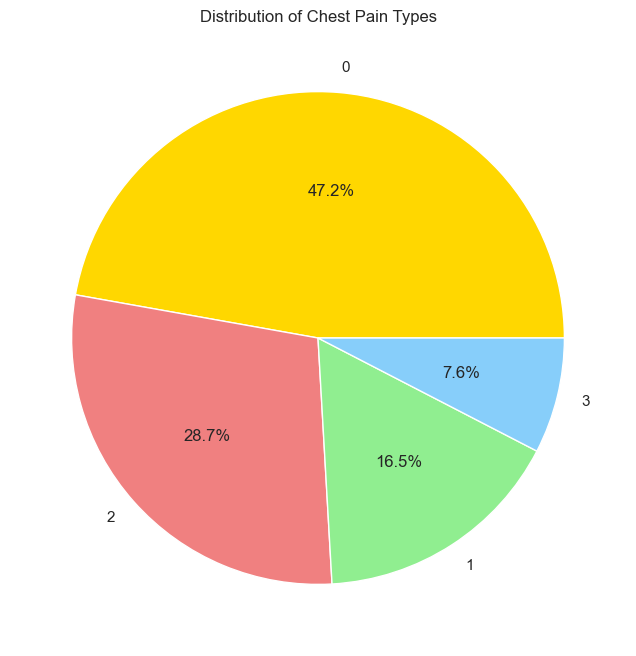

In [356]:
#to show the types distribution of chest pain
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

data_column = 'chest_pain'

chest_pain_counts = df[data_column].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(chest_pain_counts, labels=chest_pain_counts.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Distribution of Chest Pain Types')
plt.show()

here we get to know which type of chest pain is prominent in these heart patients

cp : Chest Pain type chest pain type

value 0: No chest pain

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

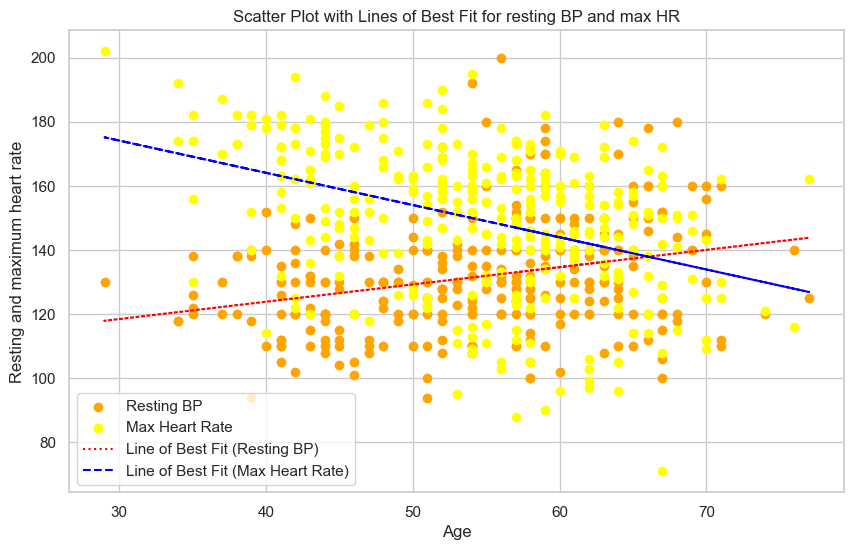

In [354]:
#to see the variations in the maximum heart rate and resting blood pressure as age increases

plt.figure(figsize=(10, 6))

plt.scatter(df['age'], df['resting_bp'], c='orange', label='Resting BP')
plt.scatter(df['age'], df['max_hr'], c='yellow', label='Max Heart Rate')

# Calculate the line of best fit for 'resting_bp'
resting_bp_fit = np.polyfit(df['age'], df['resting_bp'], 1)
resting_bp_line = np.poly1d(resting_bp_fit)

# Calculate the line of best fit for 'max_hr'
max_hr_fit = np.polyfit(df['age'], df['max_hr'], 1)
max_hr_line = np.poly1d(max_hr_fit)

# Plot the lines of best fit
plt.plot(df['age'], resting_bp_line(df['age']), color='red', linestyle=':', label='Line of Best Fit (Resting BP)')
plt.plot(df['age'], max_hr_line(df['age']), color='blue', linestyle='--', label='Line of Best Fit (Max Heart Rate)')

plt.title('Scatter Plot with Lines of Best Fit for resting BP and max HR')
plt.xlabel('Age')
plt.ylabel('Resting and maximum heart rate')
plt.legend()
plt.show()

In [ ]:
  #conclusion for the above

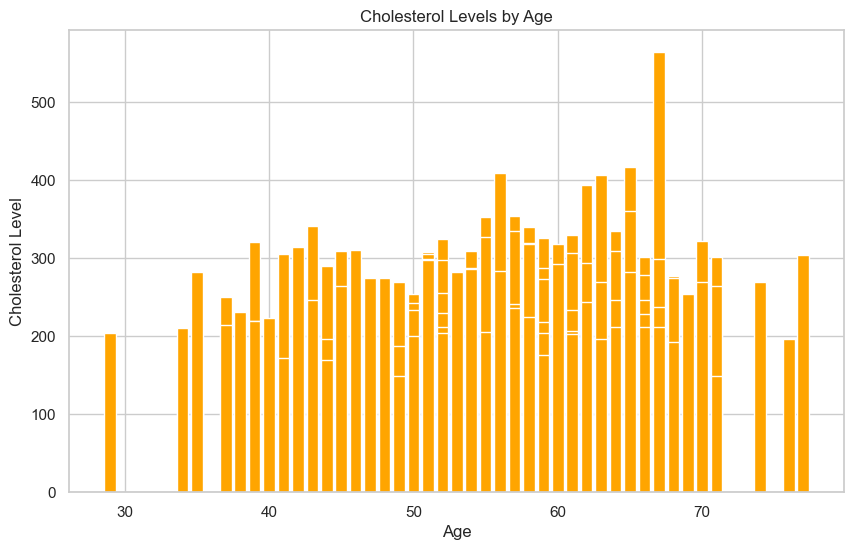

In [314]:
#to know the relationship between cholesterol and age
df=pd.read_csv('heart.csv')

plt.figure(figsize=(10, 6))
plt.bar(df['age'], df['chol'], color='orange')
plt.title('Cholesterol Levels by Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()


the cholesterol level is almost the same but we can see a slight increase in the cholesterol level as age increases and can be the max for people aging between 50 to 70

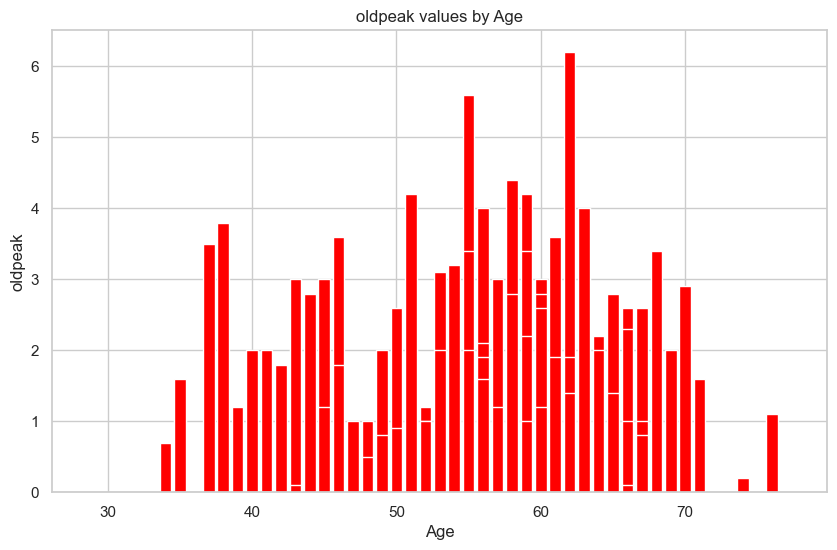

In [308]:
#to know the relationship between oldpeak and age

df=pd.read_csv('heart.csv')

plt.figure(figsize=(10, 6))
plt.bar(df['age'], df['oldpeak'], color='red')

plt.title('oldpeak values by Age')
plt.xlabel('Age')
plt.ylabel('oldpeak')
plt.show()

we can see the is an abrupt variation in these heart patients and people aging between 50 and 70 have the high ST-depression value in the graph of the ECG monitor

In [285]:
#to understand the cholesterol distribution in these patients
df['chol'].mean(), df['chol'].median(), df['chol'].kurt()

(246.26402640264027, 240.0, 4.505423167753712)

the cholesterol distribution is more peaked and has heavier tails compared to a normal distribution. This suggests that there might be some extreme values or outliers in the cholesterol data, leading to the increased kurtosis.

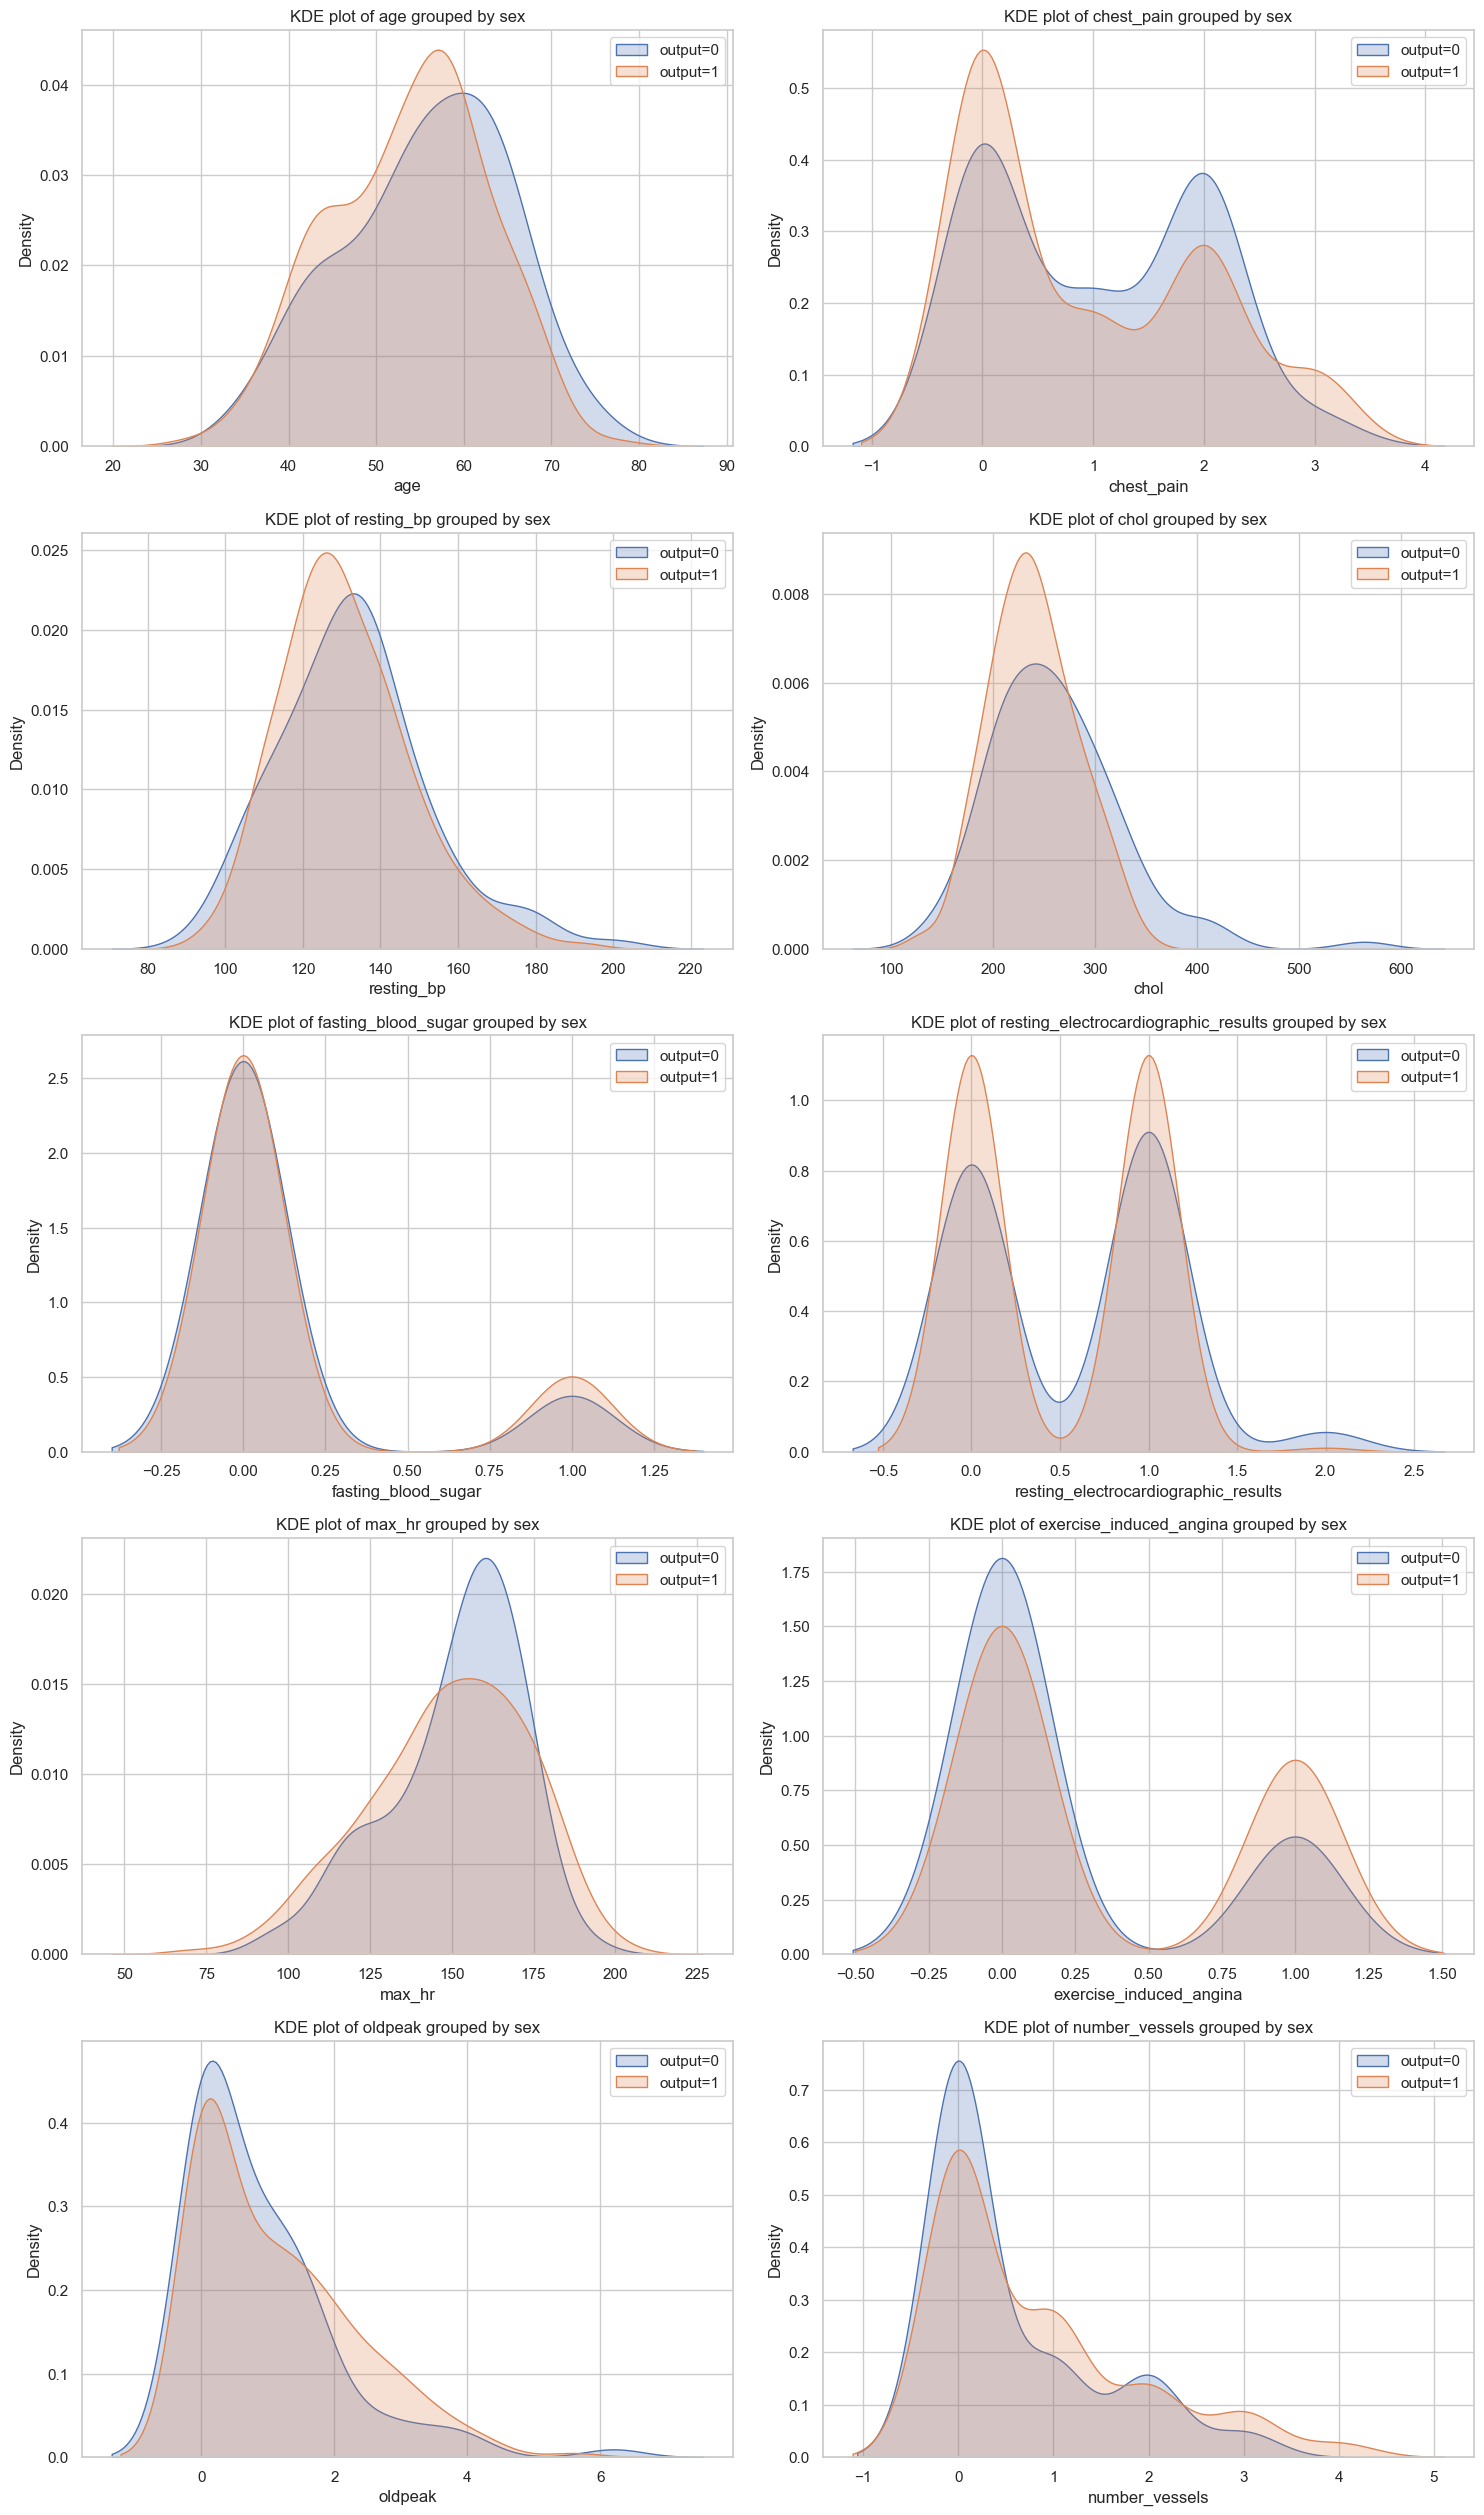

In [352]:
#to construct kde plot to understand the skewness and kurtosis visually #// 2
num_columns = len(df.columns) - 1  
num_rows = (num_columns + 1) 

plt.figure(figsize=(15, 5*num_rows))

for i, column in enumerate(df.columns.drop('sex')):   #enumerate: Adds a counter to the elements of the modified Index, creating pairs of index and column name.
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[df['sex'] == 0][column], label='output=0', fill=True)
    sns.kdeplot(data=df[df['sex'] == 1][column], label='output=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by sex')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

by the above graph we can see that the values such as oldpeak and maximum heart rate fasting blood sugar etc... vary almost the same in in both the genders in except few cases we can also see the tails of the graph and approximately predict the number of outliers in the data and skewness of the dataset

In [312]:
#lets check the skewness and kurtosis of the data
df.skew()

age                                    -0.202463
sex                                    -0.791335
chest_pain                              0.484732
resting_bp                              0.713768
chol                                    1.143401
fasting_blood_sugar                     1.986652
resting_electrocardiographic_results    0.162522
max_hr                                 -0.537410
exercise_induced_angina                 0.742532
oldpeak                                 1.269720
number_vessels                          1.310422
dtype: float64

AGE (-0.202463): The distribution is relatively symmetric, with a slight tendency towards younger ages.
    
'

SEX (-0.791335): Negatively skewed, suggesting a distribution with a longer left tail. The data may have a higher concentration of one gender.
    so mosty more number of patients are female
    
'

Chest Pain (0.484732) : Right tailed, Chest pain occurrences may be more concentrated in certain categories.    

'

Resting Blood Pressure (0.713768): suggesting a distribution with a longer right tail.
Higher resting blood pressure values may be more dispersed.

'

Cholesterol (1.143401): Indicating a distribution with a more pronounced right tail.
Higher cholesterol levels may be more dispersed.

'

Fasting Blood Sugar (1.986652): Highly positively skewed, suggesting a distribution with a significantly longer right tail.
Elevated fasting blood sugar levels may be less common in the dataset.

'

Resting Electrocardiographic Results (0.162522): A distribution with a slightly longer Right tail.
Electrocardiographic results may be more concentrated in having ST-T wave abnormality and showing probable or definite left ventricular hypertrophy by Estes' criteria.

'

Max Heart Rate (-0.537410):  The distribution of maximum heart rates is relatively symmetric.

'

Exercise-Induced Angina (0.742532): Indicates a distribution with a longer right tail. Instances of exercise-induced angina may be more dispersed.

'

Oldpeak (1.269720): Moderately positively skewed, suggesting a distribution with a more pronounced right tail. Oldpeak values may be more dispersed.

'

Number of Vessels (1.310422): The number of vessels affected may be more dispersed.

In [313]:
#to check kurtosis 
df.kurt()

age                                    -0.542167
sex                                    -1.382961
chest_pain                             -1.193071
resting_bp                              0.929054
chol                                    4.505423
fasting_blood_sugar                     1.959678
resting_electrocardiographic_results   -1.362673
max_hr                                 -0.061970
exercise_induced_angina                -1.458317
oldpeak                                 1.575813
number_vessels                          0.839253
dtype: float64

Age (-0.542167): The ages are relatively evenly distributed without extreme values.
    
'

Sex (-1.382961): Leptokurtic distribution with heavier tails.
There may be a concentration of one gender, possibly indicating an imbalance.

'

Chest Pain (-1.193071): Leptokurtic distribution with heavier tails.
Value 1: typical angina
Value 2: atypical angina
these two types are suffered the most.

'

Resting Blood Pressure (0.929054): Mesokurtic distribution.
The distribution of resting blood pressure is approximately normal.

'

Cholesterol (4.505423): Highly leptokurtic distribution with very heavy tails.
Cholesterol levels are widely dispersed with potential extreme values and there are few cases where the cholesterol value of the patients were too high 

'

Fasting Blood Sugar (1.959678): Highly leptokurtic distribution with heavy tails.
Elevated fasting blood sugar levels are less common.

'

Resting Electrocardiographic Results (-1.362673): Leptokurtic distribution with heavier tails.

'

Max Heart Rate (-0.061970): Close to a normal distribution.
Maximum heart rates are relatively evenly distributed. 

'

Exercise-Induced Angina (-1.458317): Leptokurtic distribution with heavier tails.
Instances of exercise-induced angina maybe more

'

Oldpeak (1.575813): Highly leptokurtic distribution with heavy tails.
Oldpeak values are widely dispersed with potential extreme values.

'

Number of Vessels (0.839253): Mesokurtic distribution.
The number of vessels affected is approximately normally distributed.

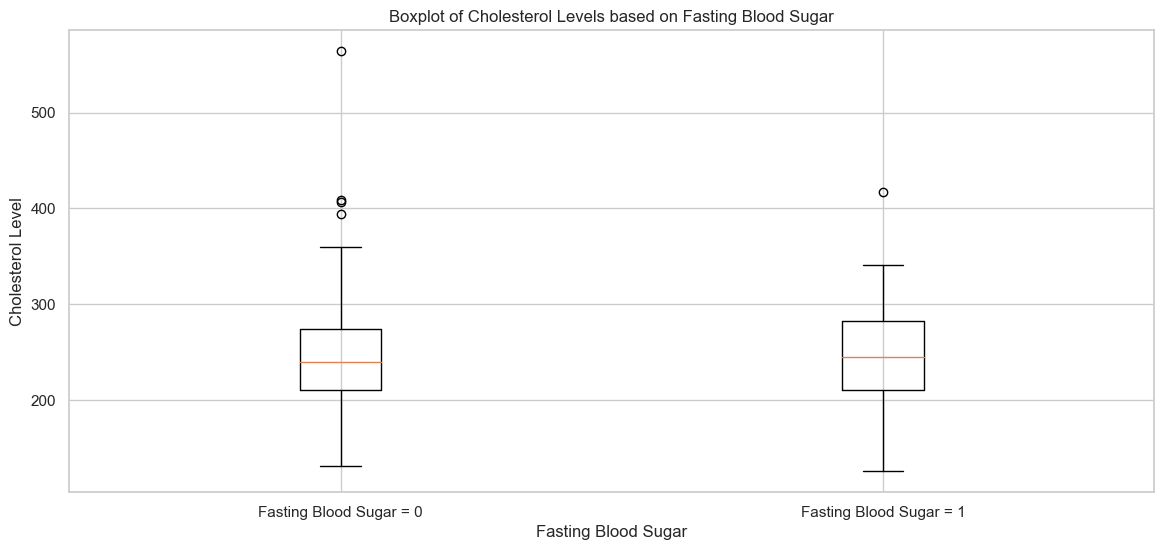

In [303]:
# A bar plot to understand how cholestrol is spread according to the fasting blood sugar
#fasting blood sugar marked as 1 is the blood sugar value more than 120 mg/dl

plt.figure(figsize=(14, 6))
plt.boxplot([df[df['fasting_blood_sugar'] == 0]['chol'],df[df['fasting_blood_sugar'] == 1]['chol']],labels=['Fasting Blood Sugar = 0', 'Fasting Blood Sugar = 1'])
plt.title('Boxplot of Cholesterol Levels based on Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Cholesterol Level')
plt.show()

The box plot of cholesterol levels based on fasting blood sugar shows a trend where the median cholesterol level is significantly lower for individuals with fasting blood sugar greater than 0 compared to those with fasting blood sugar equal to 0. This indicates that there may be a relationship between high fasting blood sugar and elevated cholesterol levels. 


The presence of outliers in the box plot tells that there may be a few extreme cases within the dataset. These outliers are the individuals with extremely high cholesterol levels, regardless of their fasting blood sugar. These outliers could influence the interpretation of the results and suggest that additional measures, such as aggressive lifestyle interventions, may be necessary for these individuals to lower their cholesterol levels. 

In [318]:
#to find variance in the values
df.var(ddof=0)

age                                       82.212332
sex                                        0.216449
chest_pain                                 1.061617
resting_bp                               306.571317
chol                                    2677.560653
fasting_blood_sugar                        0.126458
resting_electrocardiographic_results       0.275616
max_hr                                   522.914899
exercise_induced_angina                    0.219978
oldpeak                                    1.343646
number_vessels                             1.042273
dtype: float64

Age (82.212332): Relatively high variance, indicating a wide spread of ages.
Ages in the dataset vary considerably.

'

Sex (0.216449): Low variance, suggesting limited variability.
there are almosot the same number of females as males

'

Chest Pain (1.061617): Moderate variance, indicating some variability.
Different types of chest pain have the moderate spread

'

Resting Blood Pressure (306.571317): High variance, suggesting a wide range of blood pressure values.
Resting blood pressure values show significant variability maybe depending on age

'

Cholesterol (2677.560653): Very high variance, indicating a wide dispersion of cholesterol levels.
Cholesterol levels vary significantly across the dataset and can also have outliers

'

Fasting Blood Sugar (0.126458): Low variance, suggesting limited variability.
Fasting blood sugar levels may have less spread in the dataset and might be almost the same for many

'

Resting Electrocardiographic Results (0.275616): Low to moderate variance, indicating limited to moderate variability.
most of the patients have ST-T wave abnormality.. 

'

Max Heart Rate (522.914899): High variance, suggesting a wide range of maximum heart rates. they vary considerably.

'

Exercise-Induced Angina (0.219978): Low variance, suggesting limited variability. there might be people who were not into exercise induced Angina or they were in considerable amount

'

Oldpeak (1.343646): Moderate variance, indicating some variability.
Oldpeeak values vary with different patients and have wide range of old peak values

'

Number of Vessels (1.042273): Moderate variance, suggesting some variability.
The number of vessels affected has moderate spread.

The dataset exhibits significant variability in several features, such as age, resting blood pressure, cholesterol, and max heart rate.
Higher variance in these features suggests a diverse range of values.

In [319]:
#to find standard deviation in the values
df.std()

age                                      9.082101
sex                                      0.466011
chest_pain                               1.032052
resting_bp                              17.538143
chol                                    51.830751
fasting_blood_sugar                      0.356198
resting_electrocardiographic_results     0.525860
max_hr                                  22.905161
exercise_induced_angina                  0.469794
oldpeak                                  1.161075
number_vessels                           1.022606
dtype: float64

the same can be concluded as the above conclusion seeing at these values

Features with higher standard deviation values, such as resting blood pressure and max heart rate, indicate more diverse and spread-out values.

# 6. What we understand by the Data

If any person heart Rate increases above 150 

or 

the person is induced into angina exercises 

or 

has cholesterol level more than 230 mg/dl

or

if the old peak value is more than 1mm 

the person is likely to suffer an heart attack and has to be aware of his/her daily routine and be conscious about is health 


the person prone to heart attack some times may or may not be related to the fasting blood sugar (fasting blood sugar > 120 mg/dl) 

the patients who already suffered from heart attack need not have oly one vessel diseased but it can vary in different people and can go up to 4 vessels being damaged.

as the age increases the max heart value of a person varies and can also decrease making that person more prone to heart conditions

-------------------------------------------------------------------------------------------------------------------------------

if a person feels chest pain in these 2 types

Value 2: atypical angina

Value 3: non-anginal pain

the person must 1st confront a medic and can be serious 
